In [1]:
# !pip install pandas
# !pip install plotly

In [2]:
import ast
import itertools
from pathlib import Path
from collections import defaultdict
from itertools import combinations, permutations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.4, 0.4, '$\\phi_{i}(v) :=  \\sum_{S \\subseteq N\\backslash i}    \\frac{|S|!(n-|S|-1)!}{n!} (v(S\\cup\\{i\\}) - v(S))$')

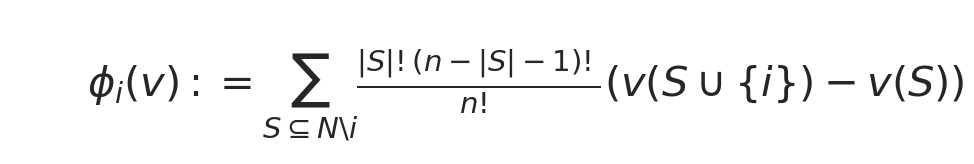

In [3]:
##### Shapely Value Formula #####

a = r'\phi_{i}(v) :=  \sum_{S \subseteq N\backslash i}    \frac{|S|!(n-|S|-1)!}{n!} (v(S\cup\{i\}) - v(S))'
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %a,size=30)

In [5]:
### reading in datasetD:\MyGraduate\paper\WWW\diffusion_shapely_value\data\compositions.csv
data_path = 'D:\MyGraduate\paper\WWW\diffusion_shapely_value\data\compositions.csv'
data_path_resolve = Path(data_path).resolve()
data_raw = pd.read_csv(data_path_resolve)
data_raw

,no.,element,FID
0,mona_lisa_g1,stableDiffusion-pruned-v-1-5,8.215650e-17
1,mona_lisa_g2,controlNet,8.798517e-17
2,mona_lisa_g3,"controlNet,da Leonardo da vinci",-9.200973e-17
3,mona_lisa_g4,"controlNet,da Leonardo da vinci,mona_lisa",4.773959e-17
4,mona_lisa_g5,"controlNet,da Leonardo da vinci,mona_lisa,Lora...",-1.065814e-16
5,mona_lisa_g6,da Leonardo da vinci,-1.015854e-16
6,mona_lisa_g7,"da Leonardo da vinci,mona_lisa",-1.981748e-16
7,mona_lisa_g8,"da Leonardo da vinci,mona_lisa,Lora:wjqLeonardo:1",-3.719247e-17
8,mona_lisa_g9,mona_lisa,-1.101896e-16
9,mona_lisa_g10,"mona_lisa,Lora:wjqLeonardo:1",2.636780e-17


In [6]:
columns = ['element', 'FID']
# columns = ['element', 'DHash']
# columns = ['element', 'Histogram']
# columns = ['element', 'Cosin']
data = data_raw[columns].copy()

def add_start_absorbing_state_func(conversion, path):
    path = ast.literal_eval(path)

    return path

def get_pure_ssim_func(value, models_value, x):
    return value - models_value


# data['combinations'] = data.apply(lambda x: add_start_absorbing_state_func(x['SSIM'], x['element']), axis = 1)

data['PFID'] = data.apply(lambda x: get_pure_ssim_func(x['FID'], data['FID'][0], x), axis = 1)
# data['PDHash'] = data.apply(lambda x: get_pure_ssim_func(x['DHash'], data['DHash'][0], x), axis = 1)
# data['PHistogram'] = data.apply(lambda x: get_pure_ssim_func(x['Histogram'], data['Histogram'][0], x), axis = 1)
# data['PCosin'] = data.apply(lambda x: get_pure_ssim_func(x['Cosin'], data['Cosin'][0], x), axis = 1)
data

,element,FID,PFID
0,stableDiffusion-pruned-v-1-5,8.215650e-17,0.000000e+00
1,controlNet,8.798517e-17,5.828671e-18
2,"controlNet,da Leonardo da vinci",-9.200973e-17,-1.741662e-16
3,"controlNet,da Leonardo da vinci,mona_lisa",4.773959e-17,-3.441691e-17
4,"controlNet,da Leonardo da vinci,mona_lisa,Lora...",-1.065814e-16,-1.887379e-16
5,da Leonardo da vinci,-1.015854e-16,-1.837419e-16
6,"da Leonardo da vinci,mona_lisa",-1.981748e-16,-2.803313e-16
7,"da Leonardo da vinci,mona_lisa,Lora:wjqLeonardo:1",-3.719247e-17,-1.193490e-16
8,mona_lisa,-1.101896e-16,-1.923461e-16
9,"mona_lisa,Lora:wjqLeonardo:1",2.636780e-17,-5.578871e-17


In [7]:
data_lvl1 = data[['element', 'PFID']].sort_values(by=['PFID'])
# data_lvl1 = data[['element', 'PDHash']].sort_values(by=['PDHash'])
# data_lvl1 = data[['element', 'PHistogram']].sort_values(by=['PHistogram'])
# data_lvl1 = data[['element', 'PCosin']].sort_values(by=['PCosin'])
# second level - groupby userid, concat distinct marketing channel and label if any conversion took place with this channel mix
data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
    {'element': lambda x: ','.join(map(str, x.unique())),
     'PFID': max})
# data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
#     {'element': lambda x: ','.join(map(str, x.unique())),
#      'PDHash': max})
# data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
#     {'element': lambda x: ','.join(map(str, x.unique())),
#      'PHistogram': max})
# data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
#     {'element': lambda x: ','.join(map(str, x.unique())),
#      'PCosin': max})

data_lvl2

,element,PFID
0,Lora:wjqLeonardo:1,1.598374e-16
1,controlNet,5.828671e-18
2,"controlNet,da Leonardo da vinci",-1.741662e-16
3,"controlNet,da Leonardo da vinci,mona_lisa",-3.441691e-17
4,"controlNet,da Leonardo da vinci,mona_lisa,Lora...",-1.887379e-16
5,da Leonardo da vinci,-1.837419e-16
6,"da Leonardo da vinci,mona_lisa",-2.803313e-16
7,"da Leonardo da vinci,mona_lisa,Lora:wjqLeonardo:1",-1.193490e-16
8,mona_lisa,-1.923461e-16
9,"mona_lisa,Lora:wjqLeonardo:1",-5.578871e-17


In [8]:
#### setting up the formulas for shapley value
def power_set(List):
    PS = [list(j) for i in range(len(List)) for j in itertools.combinations(List, i + 1)]
    return PS

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

def v_function(A, C_values):
    '''
    This function computes the worth of each coalition.
    inputs:
            - A : a coalition of channels.
            - C_values : A dictionnary containing the number of conversions that each subset of channels has yielded.
    '''
    subsets_of_A = subsets(A)
    worth_of_A = 0
    for subset in subsets_of_A:
        if subset in C_values:
            worth_of_A += C_values[subset]
    return worth_of_A


def subsets(s):
    '''
    This function returns all the possible subsets of a set of channels.
    input :
            - s: a set of channels.
    '''
    if len(s) == 1:
        return s
    else:
        sub_channels = []
        for i in range(1, len(s) + 1):
            sub_channels.extend(map(list, itertools.combinations(s, i)))
    return list(map(",".join, map(sorted, sub_channels)))

In [9]:
def calculate_shapley(df, channel_name, conv_name):

    # casting the subset into dict, and getting the unique channels
    c_values = df.set_index(channel_name).to_dict()[conv_name]
    channels = df[channel_name].apply(lambda x: x.split(",")).explode().unique()

    v_values = {}
    for A in power_set(channels):  # generate all possible channel combination
        v_values[','.join(sorted(A))] = v_function(A, c_values)
    n = len(channels)  # no. of channels
    shapley_values = defaultdict(int)

    for channel in channels:
        for A in v_values.keys():
            if channel not in A.split(","):
                cardinal_A = len(A.split(","))
                A_with_channel = A.split(",")
                A_with_channel.append(channel)
                A_with_channel = ",".join(sorted(A_with_channel))
                weight = (factorial(cardinal_A) * factorial(n - cardinal_A - 1) / factorial(
                    n))  # Weight = |S|!(n-|S|-1)!/n!
                contrib = (v_values[A_with_channel] - v_values[A])  # Marginal contribution = v(S U {i})-v(S)
                shapley_values[channel] += weight * contrib
        # Add the term corresponding to the empty set
        shapley_values[channel] += v_values[channel] / n

    return shapley_values

In [10]:
### calculating the shapley value of the channel
shapley_dict = calculate_shapley(data_lvl2, 'element', 'PFID')
# shapley_dict = calculate_shapley(data_lvl2, 'element', 'PDHash')
# shapley_dict = calculate_shapley(data_lvl2, 'element', 'PHistogram')
# shapley_dict = calculate_shapley(data_lvl2, 'element', 'PCosin')
shapley_dict
# shapley_result = pd.DataFrame(list(shapley_dict.items()), columns=['channel', 'shapley_value'])
# shapley_result

defaultdict(int,
            {'Lora:wjqLeonardo:1': 1.5983742107650306e-16,
             'controlNet': -9.27267522025469e-17,
             'da Leonardo da vinci': -4.2246299051621827e-16,
             'mona_lisa': -3.4398410046302765e-16,
             'stableDiffusion-pruned-v-1-5': 0.0,
             'stablydiffusedsMagnum__ v10': -2.62012633811537e-16})